In [1]:
import numpy as np
from PIL import Image
import scipy
import matplotlib.pyplot as plt

In [2]:
test_image = np.array(Image.open("amogus.webp"))
test_image_blurred = scipy.ndimage.gaussian_filter(test_image, sigma=50, axes=[0,1], order=0)

In [3]:
def stdnormpdf(x, y, sx, sy):
    return 1/(2*np.pi*sx*sy) * np.exp(-((x*x)/(sx*sx)+(y*y)/(sy*sy))/2)

def rectpdf(x, y, sx, sy):
    return 1-np.tanh(((x/sx)*(x/sx) + (y/sy)*(y/sy)))

In [4]:
np.array(test_image).shape

(1080, 1920, 3)

In [5]:
test_image_blurred.shape

(1080, 1920, 3)

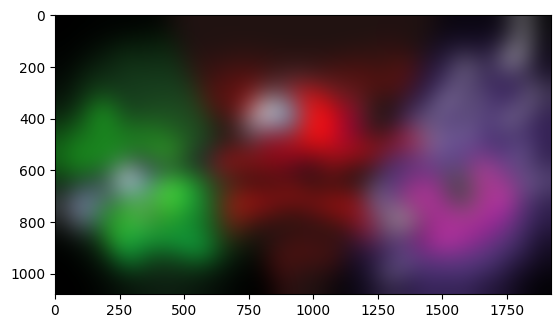

In [6]:
plt.imshow(test_image_blurred)

In [7]:
transformed = scipy.fft.dctn(test_image, axes=[0,1])
transformed_padded = scipy.fft.dctn(test_image, axes=[0,1])

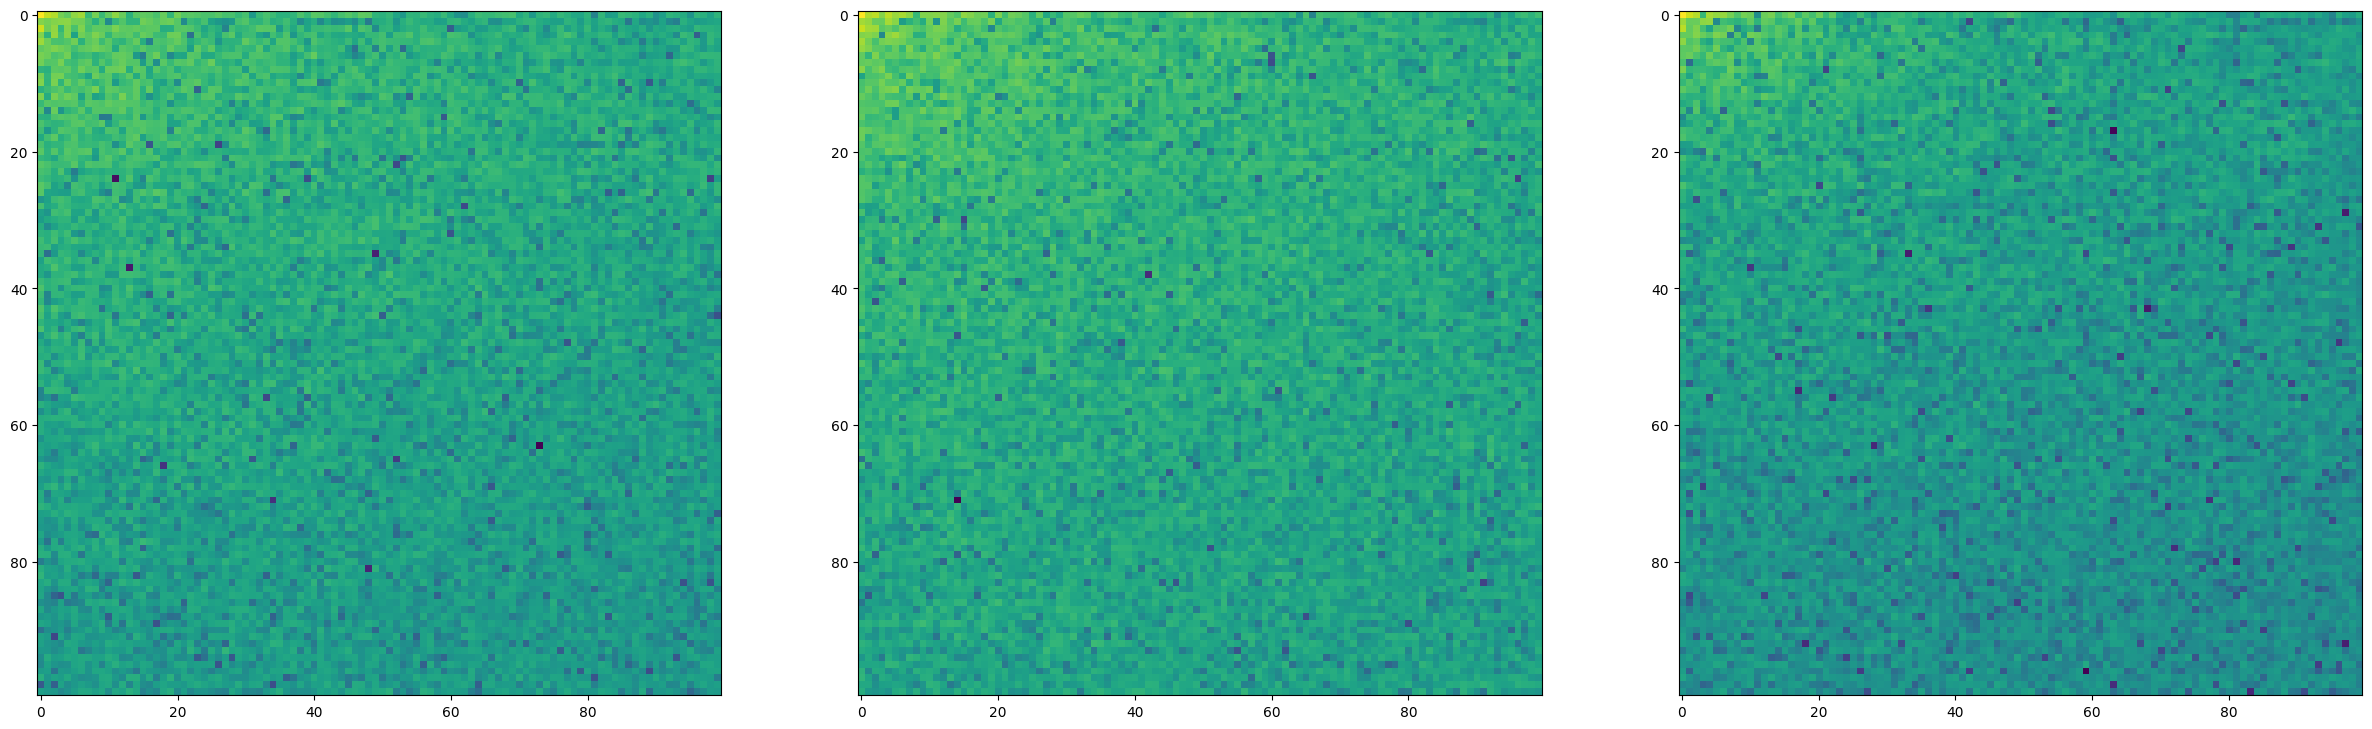

In [8]:
def show_dct(img, norm="log"):
    fig, ax = plt.subplots(1,3,figsize=(30, 90))
    for i in range(3):
        ax[i].imshow(np.abs(img[:,:,i]), norm=norm)

show_dct(transformed[:100,:100,:])

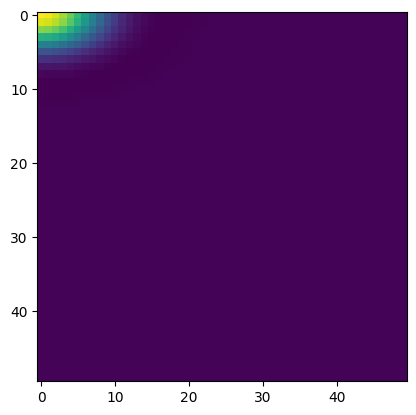

In [9]:
dist_t = rectpdf(np.arange(1080)[:,None], np.arange(1920)[None,:], 200, 200)
dist = scipy.fft.dctn(dist_t, axes=[0,1])
plt.imshow(dist[:50,:50], norm="linear")

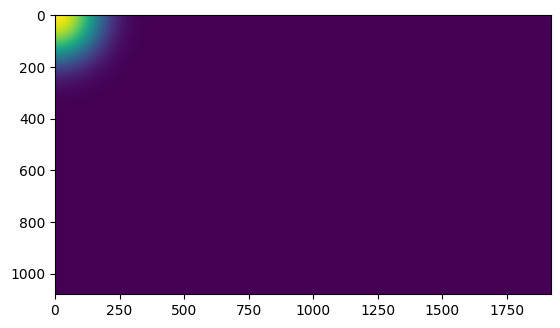

In [10]:
plt.imshow(scipy.fft.idctn(dist, axes=[0,1])[:,:], norm="linear")

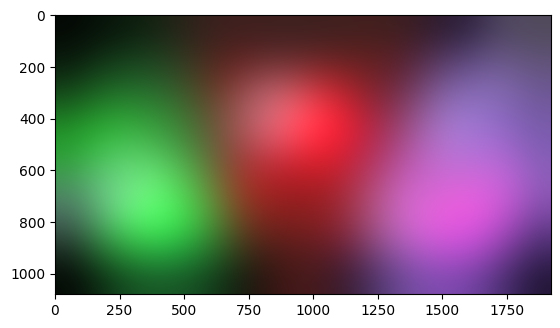

In [11]:
test_image_blur2 = scipy.fft.idctn(transformed_padded * dist[:,:,None], axes=[0,1])
test_image_blur2 *= 255 / np.max(test_image_blur2)
test_image_distort = np.round(test_image_blur2).astype(np.uint8)

test_image_retransform = scipy.fft.dctn(test_image_blur2, axes=[0,1])
test_image_distort_retransform = scipy.fft.dctn(test_image_distort, axes=[0,1])

preblur_img = Image.fromarray(test_image_distort)
preblur_img.save("amogus_preblur.tiff")

plt.imshow(preblur_img)

In [12]:
print(np.max(np.abs(test_image_blur2 - preblur_img)))
print(np.max(test_image_blur2))

0.4999999496847565
255.0


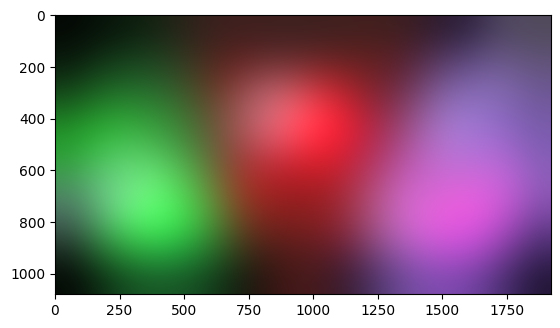

In [13]:
img_reloaded = np.array(Image.open("amogus_preblur.tiff"))
img_reloaded_transform = scipy.fft.dctn(img_reloaded, axes=[0,1])
plt.imshow(img_reloaded)

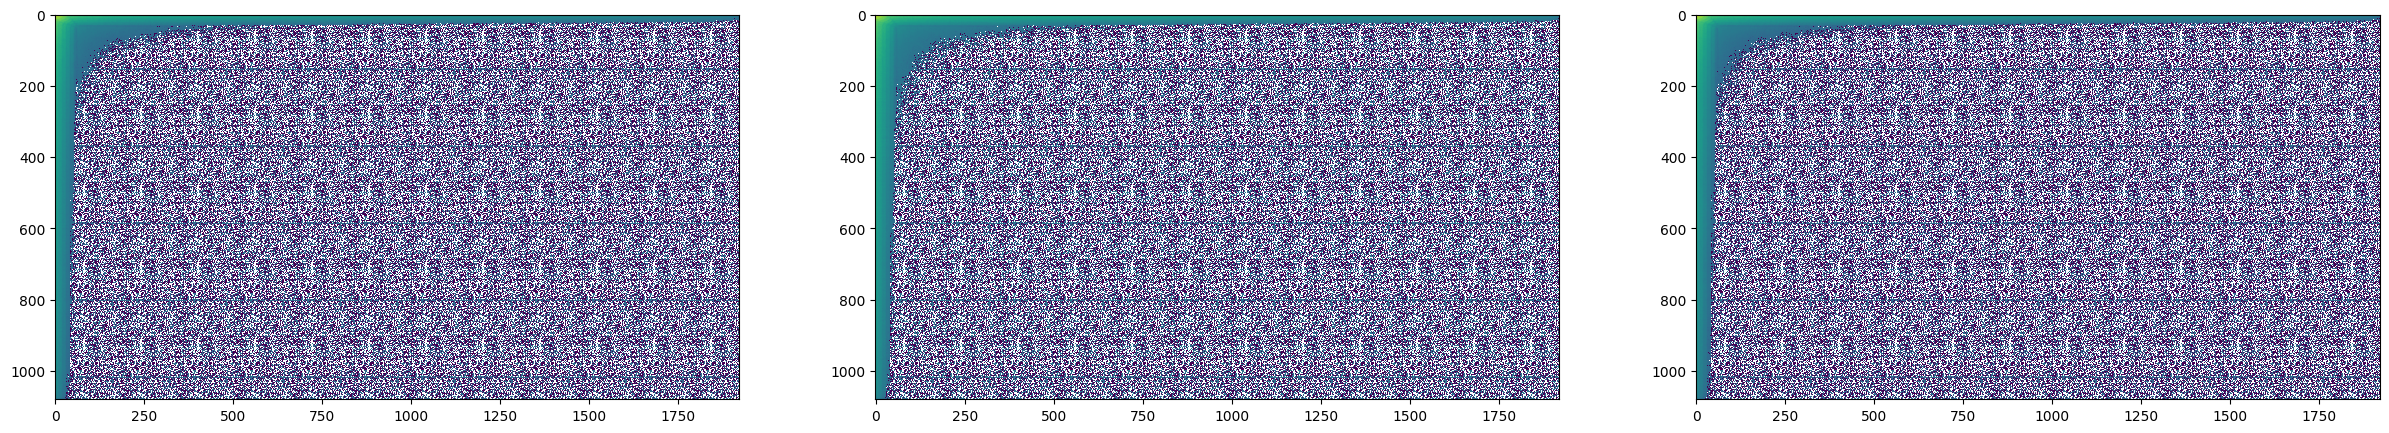

In [14]:
show_dct(test_image_retransform)

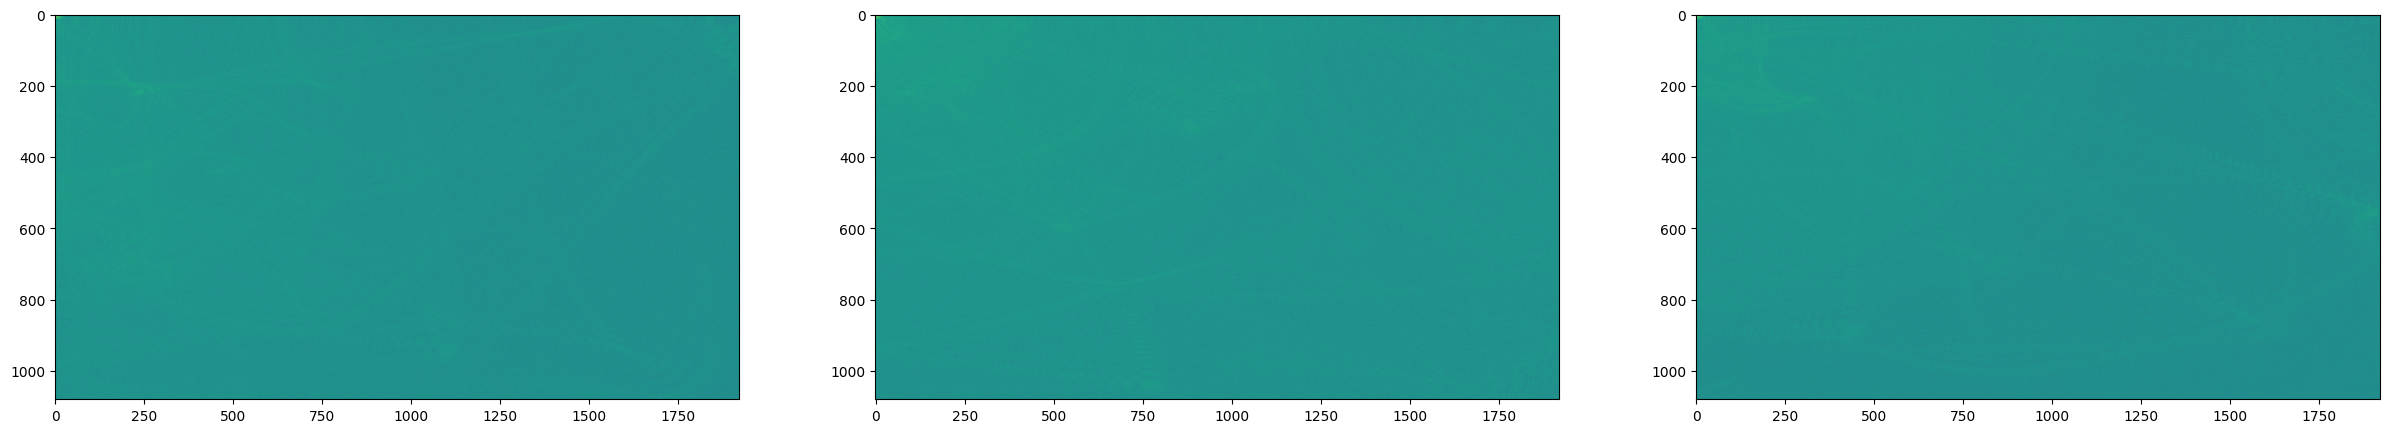

In [15]:
show_dct(test_image_distort_retransform)

In [16]:
eps = 1e-5
recovery_filter = 1 / (dist + (abs(dist) <= eps).astype(int))

In [17]:
recovered = scipy.fft.idctn(test_image_retransform * recovery_filter[:,:,None], axes=[0,1])

In [18]:
recovered -= np.min(recovered)
recovered /= np.max(recovered)

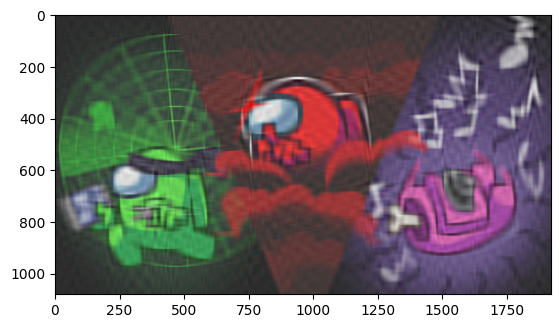

In [19]:
plt.imshow(recovered)

In [20]:
np.max(transformed[:,:,2])

np.float64(444659056.0)

In [21]:
transformed[:,:,2]

array([[ 4.44659056e+08, -1.48557982e+08,  8.24424212e+07, ...,
        -1.34973286e+04,  1.46947203e+04,  4.16772861e+03],
       [-5.06562091e+07,  1.40126199e+07, -1.49997246e+07, ...,
         3.05753493e+03,  3.72275112e+02,  1.34707115e+03],
       [-9.25816800e+07,  1.21851111e+07, -2.47556729e+07, ...,
         4.76348148e+03, -9.68972885e+03, -8.51077506e+03],
       ...,
       [ 2.02697670e+04,  7.78868864e+03, -3.21623081e+03, ...,
         1.19521954e+04, -5.86494950e+03,  1.53134989e+04],
       [-4.85203712e+03, -6.65627857e+03, -1.85023075e+04, ...,
         9.53088025e+03,  4.55346244e+03, -1.39007272e+04],
       [ 3.87875747e+04,  8.33477795e+03,  8.34986680e+02, ...,
         1.91264117e+04, -1.26514641e+04,  7.08930627e+03]])